The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting.

In [19]:
# !pip install -e ~/xgi["all"]

In [20]:
import networkx as nx
import yaml
import xgi

from src import nx_yaml

def draw(stream):
    G = yaml.compose(stream, Loader=nx_yaml.NxSafeLoader)
    G = G.graph
    G = G.to_directed()
    H = xgi.from_bipartite_graph(G)
    # nx.draw_networkx(G, pos=nx.bipartite_layout(G, {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}))
    # xgi.draw_bipartite(H)
    node_pos = xgi.weighted_barycenter_spring_layout(H)
    edge_pos = xgi.edge_positions_from_barycenters(H, node_pos)
    pos = xgi.bipartite_spring_layout(H)
    # pos = xgi.pairwise_spring_layout(H, seed=1)
    # xgi.draw_bipartite(H, pos=(node_pos, edge_pos))
    xgi.draw_bipartite(H)
    # xgi.draw_multilayer(H)
    # xgi.draw(H)

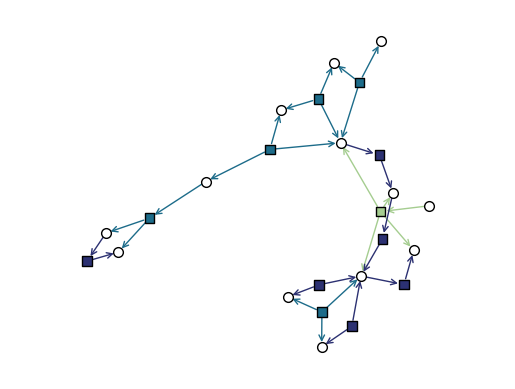

In [21]:
# https://xgi.readthedocs.io/en/latest/api/tutorials/recipes.html#8.-Plot-a-hypergraph-showing-one-order-only
# e.g H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
# TODO
draw("""
- 1: 3
  1: [2, 3]
- 1
- {2, 3}
- 1
""")

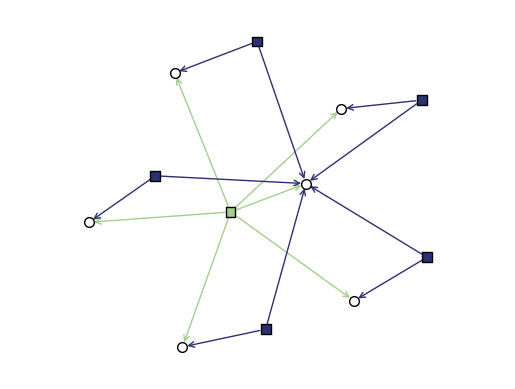

In [22]:
# in a set each scalar element is linked to
# the root mapping, so there are 6 elements in total
draw("{1, 2, 3, 4, 5}")

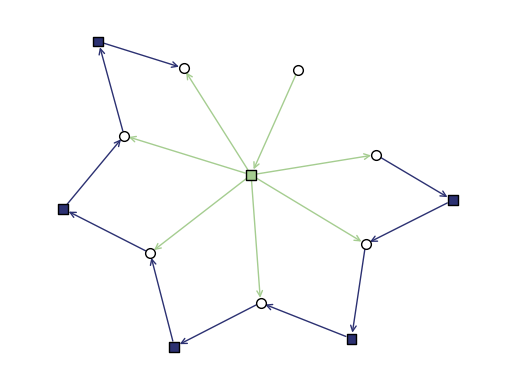

In [23]:
# lists have pairwise hyperedges
# draw("1: 2")
# draw("""
# 1: 2
# 1: 2
# 
draw("[0, 0, 0, 0, 0, 0]")

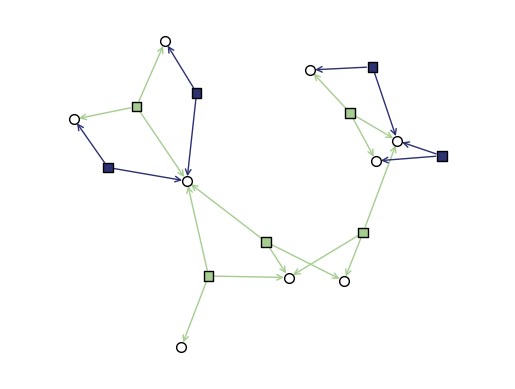

In [24]:
# maps combine all keys into one hyperedge
# and each key-value pair as well.
draw("""
a: {8, 9}
{8, 9}: a
""")

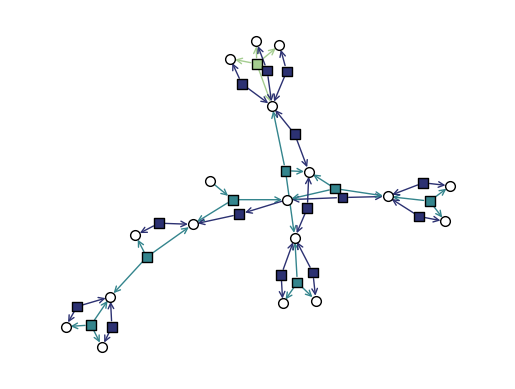

In [25]:
draw("""
- {1, 2}:
    ? {3, 4}
    ? {5, 6, 7}
- 8: {9, a}
""")

So far we have used unique integer indices to avoid confusion. These were irrelevant because the encoding only cares about document structure. It is natural to think about equal scalars as the same nodes but that must be handled separately.

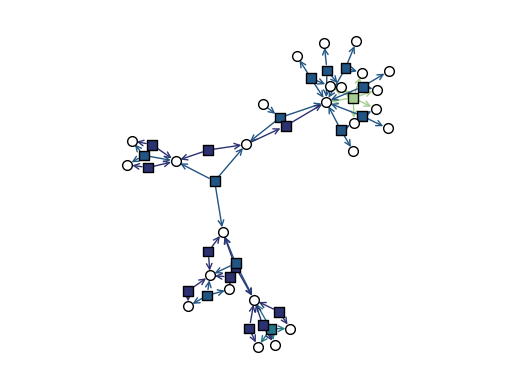

In [26]:
# nesting, lists, maps, sets with a single element.
draw("""
- {~, ~}:
    ? {~, ~}
    ? {~, ~, ~}
- ~: ~
  ~: ~
  ~: ~
  ~: ~
  ~: ~
  ~: ~
""")

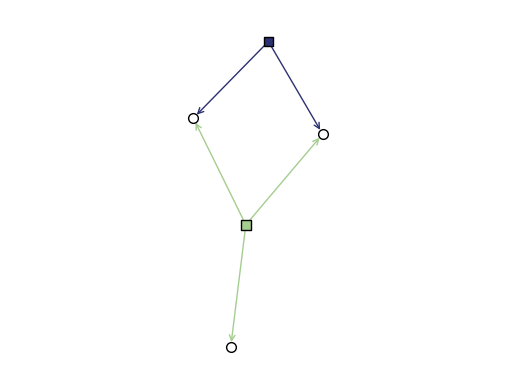

In [27]:
draw("left node: right node")